In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [79]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

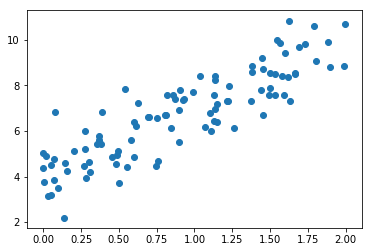

In [80]:
plt.scatter(X, y); plt.show()

In [81]:
X_b = np.c_[ np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [82]:
theta_best

array([[ 4.08076962],
       [ 2.89672604]])

In [83]:
X_new = np.array( [[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

In [84]:
y_predict

array([[ 4.08076962],
       [ 9.87422171]])

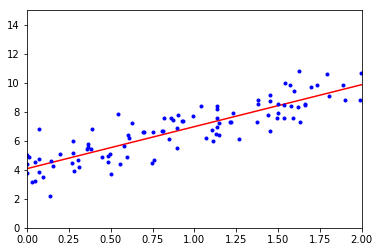

In [93]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.Legend = True
plt.show()

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.08076962]), array([[ 2.89672604]]))

In [96]:
lin_reg.predict(X_new)

array([[ 4.08076962],
       [ 9.87422171]])

In [97]:
# Gradient Descent

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initializaiton

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [98]:
theta

array([[ 4.08076962],
       [ 2.89672604]])

In [99]:
# Stocastic Gradient Descent

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initilization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [100]:
theta

array([[ 4.057791],
       [ 2.966505]])

In [101]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor( max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [102]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.05027348]), array([ 2.85270275]))

In [103]:
# Polynomial Regression

In [104]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

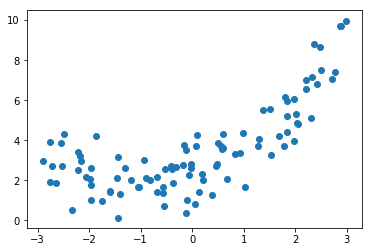

In [105]:
plt.scatter(X,y); plt.show()

In [106]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [107]:
X[0]

array([-0.05392613])

In [108]:
X_poly[0]

array([-0.05392613,  0.00290803])

In [109]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.30263341]), array([[ 0.89976341,  0.43756539]]))

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")

In [122]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

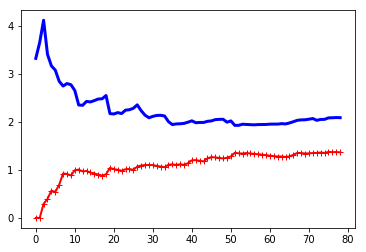

In [123]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [124]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=1, include_bias = False)),
    ("lin_reg", LinearRegression())
])

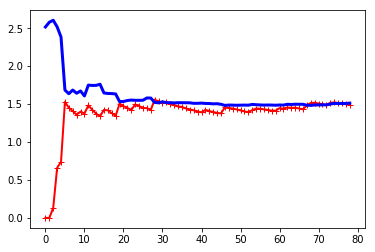

In [125]:
plot_learning_curves(polynomial_regression, X, y)

In [126]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 4.89177224]])

In [127]:
sgd_reg = SGDRegressor(max_iter = 5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.04811552])

In [128]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 4.84255551])

In [129]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 4.8452897])

In [130]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [131]:
# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])

In [132]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [141]:
sgd_reg = SGDRegressor(max_iter=1, warm_start = True, penalty=None,
                      learning_rate ="constant", eta0 = 0.0005)

In [142]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues wehre it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [143]:
from sklearn import datasets
iris = datasets.load_iris()

In [144]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [147]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [149]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

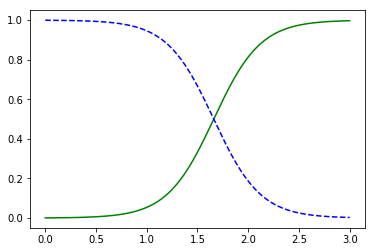

In [155]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend = True
plt.show()

In [157]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [158]:
X =  iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

In [159]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
softmax_reg.predict([[5, 2]])

array([2])

In [161]:
softmax_reg.predict([[5,2]])

array([2])